# Using the Sentiment Analysis model on our dataset

In [1]:
import pandas as pd
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
import pickle

## Load and Predict using the model

In [2]:
# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load the sentiment analysis model
model = load_model('best_model.h5')

# Define the function for batch sentiment prediction
def predict_class(df, text_column):
    '''Function to predict sentiment class of the texts in a DataFrame column'''
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len = 50
    
    # Ensure all inputs are strings
    df[text_column] = df[text_column].astype(str)
    
    # Transforms text to a sequence of integers using the loaded tokenizer
    sequences = tokenizer.texts_to_sequences(df[text_column].tolist())
    
    # Pad sequences to the same length
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)
    
    # Do the prediction using the loaded model
    predictions = model.predict(padded_sequences).argmax(axis=1)
    
    # Map predictions to sentiment classes
    predicted_classes = [sentiment_classes[i] for i in predictions]
    
    return predicted_classes

# Load your dataset and handle mixed-type column warnings by specifying dtype or setting low_memory=False
df = pd.read_csv('dataset.csv', low_memory=False)  # Adjust path as needed

# Fill NaN values in the 'content' column to ensure text operations work correctly
df['content'] = df['content'].fillna('')

# Apply the prediction function to the DataFrame
df['predicted_sentiment'] = predict_class(df, 'content')

# Save the results to a new CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)


17110/17110 [==============================] - 145s 8ms/step


In [3]:
df = pd.read_csv('sentiment_analysis_results.csv', low_memory=False)  


In [4]:
df_final = df[['content', 'predicted_sentiment']]

In [5]:
df_final

,content,predicted_sentiment
0,I’m getting a sugar daddy this year!,Neutral
1,might make em french toast after and spoon a l...,Negative
2,Our platform can be matched to your company’s ...,Positive
3,Oh my God this first song. I can't with how am...,Positive
4,Happy new year ! 😚🎉,Positive
...,...,...
547491,NaN,Neutral
547492,NaN,Neutral
547493,NaN,Neutral
547494,NaN,Neutral


In [6]:
# Calculate the number of each sentiment
sentiment_counts = df['predicted_sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

predicted_sentiment
Neutral     229532
Positive    160577
Negative    157387
Name: count, dtype: int64


## Word Cloud

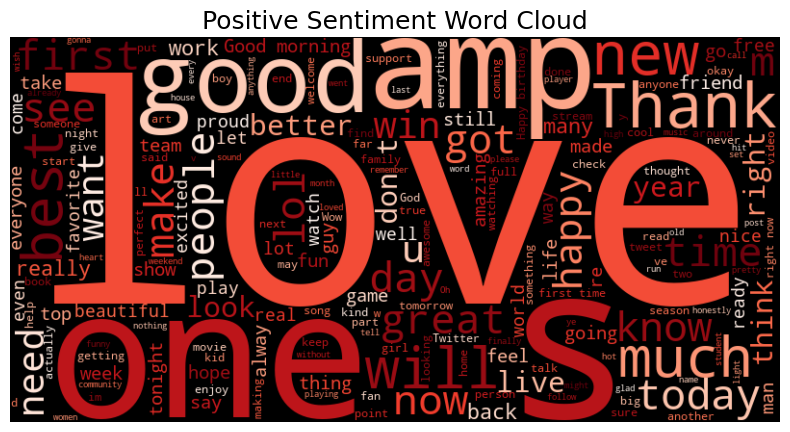

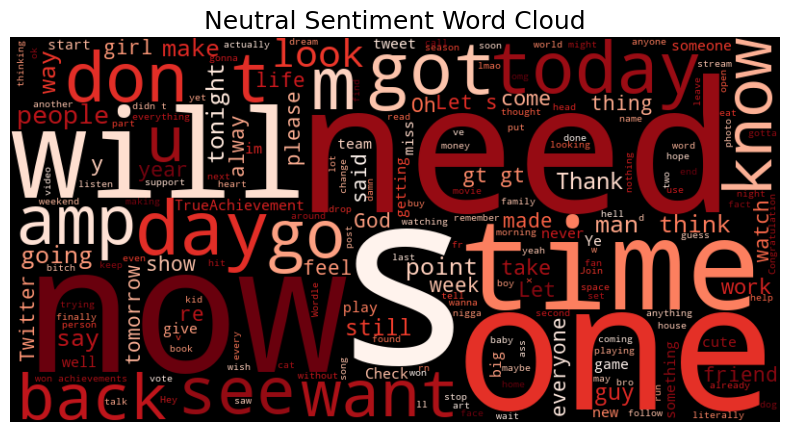

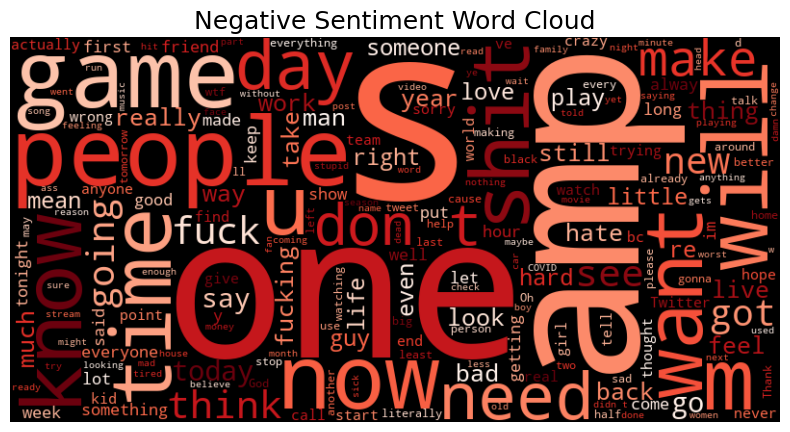

In [7]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to clean text by removing certain words or patterns
def clean_text(text):
    if text:  # Check if the text is not NaN or empty
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove individual words ('https' and 'com')
        text = re.sub(r'\bhttps\b|\bcom\b', '', text)
    return text

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, colormap='Reds').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# Apply the cleaning function to each text entry
df['content_cleaned'] = df['content'].astype(str).apply(clean_text)

# Filter the DataFrame by sentiment and concatenate the text into a single string
text_positive = ' '.join(df[df['predicted_sentiment'] == 'Positive']['content_cleaned'].dropna())
text_neutral = ' '.join(df[df['predicted_sentiment'] == 'Neutral']['content_cleaned'].dropna())
text_negative = ' '.join(df[df['predicted_sentiment'] == 'Negative']['content_cleaned'].dropna())

# Generate word cloud for each sentiment
generate_word_cloud(text_positive, 'Positive Sentiment Word Cloud')
generate_word_cloud(text_neutral, 'Neutral Sentiment Word Cloud')
generate_word_cloud(text_negative, 'Negative Sentiment Word Cloud')
